In [1]:
import build123d as bd
import stellarmesh as sm
from IPython.display import Image
import logging
import tempfile

/home/alex/micromamba/envs/stellarmesh/lib/python3.12/site-packages/pymoab/__init__.py:21: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
logging.basicConfig()
logging.getLogger("stellarmesh").setLevel(logging.INFO)
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)

In [3]:
def render_mesh(mesh: sm.Mesh):
    with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as tmp_file:
        mesh.render(tmp_file.name, rotation_xyz=(90, 0, -90), normals=0, clipping=True)
        display(Image(tmp_file.name, width=800))

In [4]:
solids = [bd.Solid.make_torus(10, 1)]
for _ in range(2):
    solids.append(bd.thicken(solids[-1].faces()[0], 1))
solids = solids[1:]
geometry = sm.Geometry(solids, material_names=["a", "a"])

INFO:stellarmesh.geometry:Importing 2 solids to geometry


# Volume meshing

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Circle)
Info    : [ 20%] Meshing curve 2 (Circle)
Info    : [ 40%] Meshing curve 3 (Circle)
Info    : [ 60%] Meshing curve 4 (Circle)
Info    : [ 70%] Meshing curve 5 (Circle)
Info    : [ 90%] Meshing curve 6 (Circle)
Info    : Done meshing 1D (Wall 0.000316038s, CPU 0.000568s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Torus, MeshAdapt)
Info    : [ 40%] Meshing surface 2 (Torus, MeshAdapt)
Info    : [ 70%] Meshing surface 3 (Torus, MeshAdapt)
Info    : Done meshing 2D (Wall 0.786718s, CPU 0.852013s)
Info    : Meshing 3D...
Info    : 3D Meshing 2 volumes with 1 connected component
Info    : Tetrahedrizing 3225 nodes...
Info    : Done tetrahedrizing 3233 nodes (Wall 0.0292775s, CPU 0.030205s)
Info    : Reconstructing mesh...
Info    :  - Creating surface mesh
Info    :  - Identifying boundary edges
Info    :  - Recovering boundary
Info    : Done reconstructing mesh (Wall 0.0645359s, CPU 0.064559s)
Info    : Found

X_ChangeProperty: BadValue (integer parameter out of range for operation) 0x0


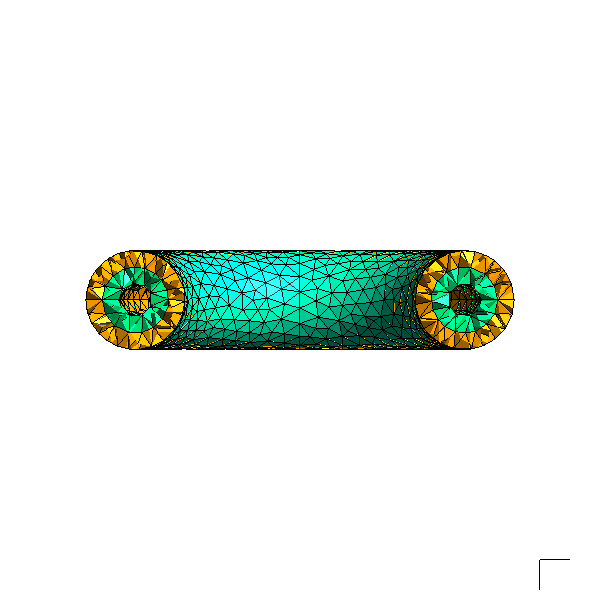

In [5]:
options = sm.GmshVolumeOptions(min_mesh_size=0.1, max_mesh_size=1)
mesh = sm.VolumeMesh.from_geometry(geometry, options)
render_mesh(mesh)